In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as pn

In [2]:
path = 'C:/Users/User/Desktop/MIT/CART/data/'
filename = 'stevens.csv'

In [3]:
stevens = pd.read_csv(path+filename)
stevens.head()

,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
1,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
4,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1


In [4]:
stevens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Docket      566 non-null    object
 1   Term        566 non-null    int64 
 2   Circuit     566 non-null    object
 3   Issue       566 non-null    object
 4   Petitioner  566 non-null    object
 5   Respondent  566 non-null    object
 6   LowerCourt  566 non-null    object
 7   Unconst     566 non-null    int64 
 8   Reverse     566 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 39.9+ KB


In [5]:
from sklearn import preprocessing

In [6]:
y = stevens['Reverse']
x = stevens.drop(columns=['Reverse'])

In [7]:
#dealing with categorical variables 
le = preprocessing.LabelEncoder()
for column_name in x.columns:
    if x[column_name].dtype == object:
        x[column_name] = le.fit_transform(x[column_name])
    else:
        pass

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# classification tree

In [42]:
clt = DecisionTreeClassifier(min_samples_leaf = 20)
clt.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

In [43]:
y_pred = clt.predict(x_test)

In [44]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


In [45]:
from sklearn import tree
from matplotlib import pyplot as plt

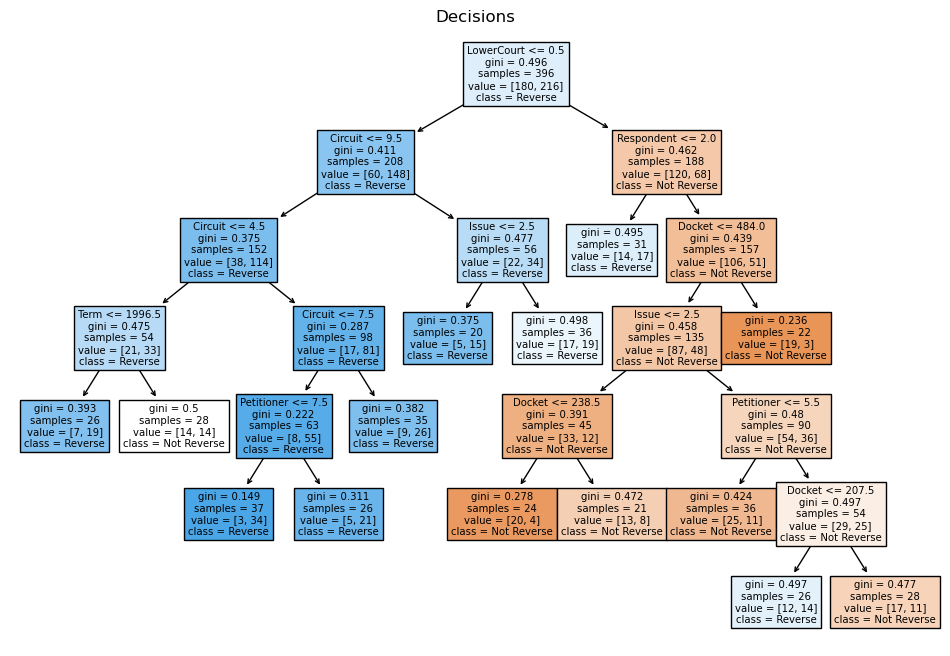

In [46]:
plt.figure(figsize=(12, 8))  # Set figure size
tree.plot_tree(clt, feature_names=x_train.columns, class_names=['Not Reverse', 'Reverse'], filled=True)
plt.title("Decisions")
plt.show()

In [47]:
from sklearn.metrics import  confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve, auc,classification_report

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[43, 34],
       [28, 65]], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        77
           1       0.66      0.70      0.68        93

    accuracy                           0.64       170
   macro avg       0.63      0.63      0.63       170
weighted avg       0.63      0.64      0.63       170



In [50]:
FP, TP, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

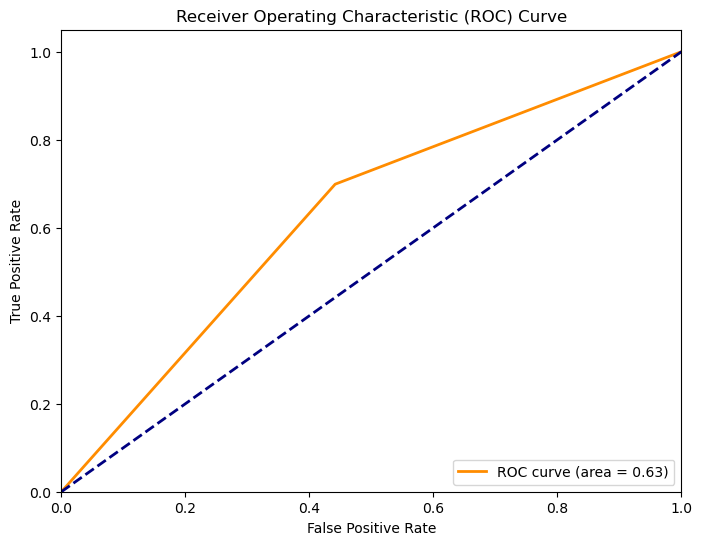

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(FP, TP, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

63% of accuracy is a good one

hypeparameter tuning

In [52]:
param_grid = {

    'max_depth': [None, 10, 20, 30],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4]

}

In [54]:
grid_search = GridSearchCV(estimator=clt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(min_samples_leaf=20),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)


In [55]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(min_samples_leaf=20),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [56]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


building the best model

In [57]:
best_dt_classifier = grid_search.best_estimator_

In [58]:
best_dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

In [59]:
best_y_pred = best_dt_classifier.predict(x_test)

In [60]:
best_accuracy = accuracy_score(y_test, best_y_pred)
print(f'Best model accuracy: {best_accuracy}')

Best model accuracy: 0.6294117647058823


In [61]:
conf_matrix = confusion_matrix(y_test, best_y_pred)
conf_matrix

array([[52, 25],
       [38, 55]], dtype=int64)

In [63]:
print(classification_report(y_test, best_y_pred))

              precision    recall  f1-score   support

           0       0.58      0.68      0.62        77
           1       0.69      0.59      0.64        93

    accuracy                           0.63       170
   macro avg       0.63      0.63      0.63       170
weighted avg       0.64      0.63      0.63       170



In [64]:
FP, TP, thresholds = roc_curve(y_test, best_y_pred)
roc_auc = roc_auc_score(y_test, best_y_pred)

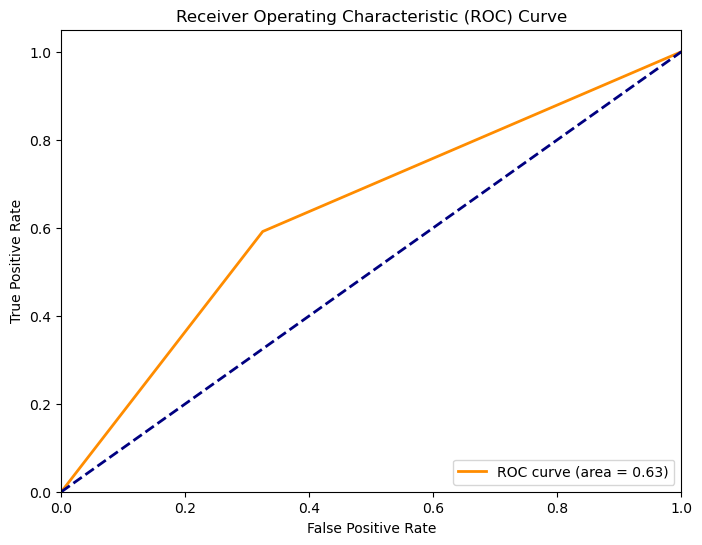

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(FP, TP, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

not imporved after hyper parameter tuning

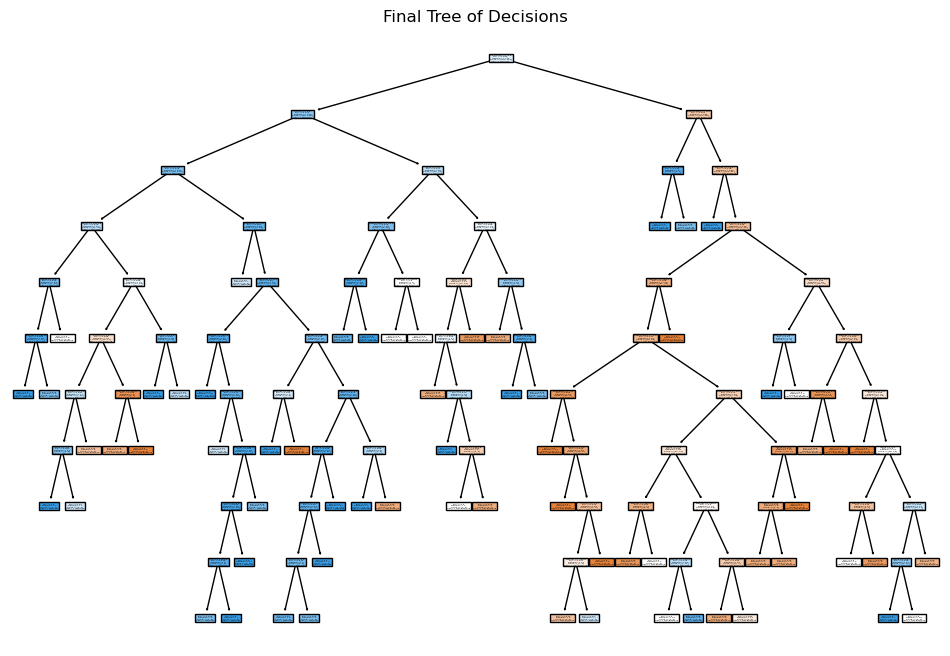

In [67]:
plt.figure(figsize=(12, 8))  # Set figure size
tree.plot_tree(best_dt_classifier, feature_names=x_train.columns, class_names=['Not Reverse', 'Reverse'], filled=True)
plt.title("Final Tree of Decisions")
plt.show()

# Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier(n_estimators=200, min_samples_leaf=20, random_state=42)

In [21]:
clf.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=20, n_estimators=200, random_state=42)

In [24]:
y_pred = clf.predict(x_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6294117647058823


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60        77
           1       0.67      0.63      0.65        93

    accuracy                           0.63       170
   macro avg       0.63      0.63      0.63       170
weighted avg       0.63      0.63      0.63       170



In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
print (conf_matrix)

[[48 29]
 [34 59]]


hyperparamter tuning, finding the best parameters

In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [34]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [35]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(min_samples_leaf=20,
                                              n_estimators=200,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [36]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [38]:
best_y_pred = best_rf_classifier.predict(x_test)

In [39]:
best_accuracy = accuracy_score(y_test, best_y_pred)
print(f'Best model accuracy: {best_accuracy}')

Best model accuracy: 0.6411764705882353


In [40]:
conf_matrix = confusion_matrix(y_test, best_y_pred)
print (conf_matrix)

[[44 33]
 [28 65]]


it looks like after finding the best parameters our model is slighty improved its accuracy to 64%, compared with decission tree model 63%